# Keras Intensive Run Analysis

In [2]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for saving metrics
import os 
import json

In [3]:
separatorHyper = "iter_|batchS_|hyper_|hlayers__|_"
separatorAlpha = "iter_|batchS_|alpha_|hlayers__|_"
seperatorHyperAlpha = "iter_|batchS_|alpha_|hyper_|hlayers__|_"

In [4]:
# GLOBAL VARIABLES
labelsGroups = [
    # ["happy", "neutral"],
    ["angry", "fear", "happy", "neutral", "sad", "surprise"],
    # ["fear", "angry"],
    # ["happy", "sad"],
    # Margarida
    # ["fear", "sad", "happy"],
    # ["happy", "angry", "neutral"],
    # ["fear", "angry", "surprise"],
    # ["fear", "angry", "surprise", "neutral"],
]

folderBase = "metrics"

separator = seperatorHyperAlpha

fixedVal = "0.1hyper"

## Accuracy for hyper parameter/alpha and hidden layer variation


Labels angry, fear, happy, neutral, sad, surprise
Max value is 0.36916667222976685
[0.36916667222976685]


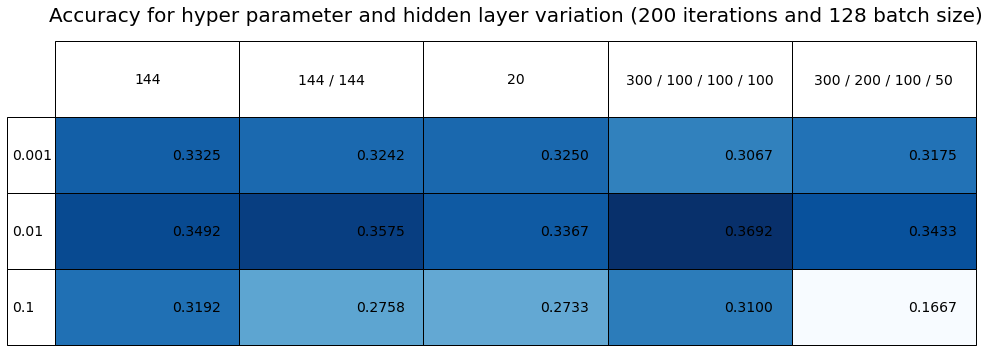

In [5]:
import re


for labels in labelsGroups:
    print(f"\nLabels {', '.join(labels)}")
    values = {}

    # Get values from files
    folders = [f for f in os.listdir(f"./{folderBase}/{'_'.join(labels)}/archive") if os.path.isdir(os.path.join(f"./{folderBase}/{'_'.join(labels)}/archive", f))]
    
    # For hyper parameter variation, fix alpha
    folders = [f for f in folders if fixedVal in f]
    
    folders.sort(key = lambda folder: (float(re.split(separator, folder)[2]), '_'.join(re.split(separator, folder)[4:])))
    for folder in folders:
        # Get categories from folder name
        folderSplit = re.split(separator, folder)
        iterations, batchSize, alpha, hyperParam, hiddenNumber = folderSplit[:5]
        hiddenNeurons = folderSplit[5:]

        # Get accuracy
        file = f"./{folderBase}/{'_'.join(labels)}/archive/{folder}/evaluation.json"
        if os.path.isfile(file):
            data = json.load(open(file, "r"))
            
            key = alpha if "alpha" not in fixedVal else hyperParam

            if key not in values.keys(): values[key]={}
            values[key]['_'.join(hiddenNeurons)] = data['accuracy']   

    Myvalues = [o for _,others in values.items() for _,o in others.items()]
    print("Max value is", max(Myvalues))
    print([v for v in Myvalues if v>(max(Myvalues)-0.01)])
    
    # Output table with relation
    columns = sorted([hl for hl in list(values[list(values.keys())[0]].keys())])
    rows = list(values.keys())
    rows.sort(key=lambda x:float(x))
    
    plt.figure(figsize=(15,1.25*len(rows)+1.25))

    data = [
        [values[r][c] for c in columns]
        for r in rows
    ]

    columns = sorted([' / '.join(hl.split("_")) for hl in columns])

    # Colorize cells depending on value
    vals = [o for _,others in values.items() for _,o in others.items()]
    normal = plt.Normalize(min(vals), max(vals))
    cellColours=plt.cm.Blues(normal(data))

    the_table = plt.table(
      cellText=[[f'{val:.4f}' for val in lst] for lst in data],
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours,
      bbox=[0.0,0,1,1]
    )
    the_table.scale(1.2, 1)
    # the_table.auto_set_font_size(False)
    the_table.set_fontsize(40)
    plt.axis('off')
    plt.axis('tight')
    plt.title(f"Accuracy for hyper parameter and hidden layer variation ({iterations} iterations and {batchSize} batch size)", fontsize=20, pad=20)    


    plt.subplots_adjust(left=0.2, top=20)
    plt.tight_layout()

    plt.savefig(f"./{folderBase}/{'_'.join(labels)}/accuracyVariationForFixed{fixedVal}.png")

## Metrics (accuracy) for sereval emotions sets

In [9]:
# Get accuracy from labels folder
accuracyData = {}

for labels in labelsGroups:
        
    accuracies = []

    # Get values from files
    folders = [f for f in os.listdir(f"./{folderBase}/{'_'.join(labels)}/archive") if os.path.isdir(os.path.join(f"./{folderBase}/{'_'.join(labels)}/archive", f))]
    folders.sort(key = lambda folder: (float(re.split(separator, folder)[2]), '_'.join(re.split(separator, folder)[4:])))
    for folder in folders:
        # Get accuracy
        file = f"./{folderBase}/{'_'.join(labels)}/archive/{folder}/evaluation.json"
        if os.path.isfile(file):
            data = json.load(open(file, "r"))
            
        accuracy=data['accuracy']
        accuracies.append(accuracy)
    
    accuracyData['\n'.join(labels)] = max(accuracies)
    
print(accuracyData)

{'angry\nfear\nhappy\nneutral\nsad\nsurprise': 0.36916667222976685}


In [7]:
# Create table

columns = sorted(accuracyData.keys(), key = lambda x : (len(x.split("\n")), x))

vals = [[accuracyData[a] for a in columns], [.595, .7125, .542, .537, .533, .4525, .388]]
values = [[f"{a:.2f}" for a in lst] for lst in vals]

# Colorize cells depending on value
valsVector = [a for lst in vals for a in lst]
normal = plt.Normalize(min(valsVector), max(valsVector))
cellColours=plt.cm.Blues(normal(vals))

# Draw figure
plt.figure(figsize=(15,10))

the_table = plt.table(
  cellText=values,
  colLabels=columns,
  rowLabels=["NN", "SVM"],
  loc='center',
  cellColours=cellColours
)

the_table.scale(1.2, 10)
the_table.set_fontsize(20)
plt.axis('off')
plt.axis('tight')
# plt.subplots_adjust(left=0.2, top=10)
plt.tight_layout()

plt.savefig(f"./{folderBase}/NNVsSVM.png")

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/goncalom/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TypeError: unsupported operand type(s) for -: 'list' and 'float'

## Training metrics for a specific model

In [159]:
# GLOBAL VARIABLES
labels = ["angry", "fear", "happy", "neutral", "sad", "surprise"]
folder = f"./metrics/{'_'.join(labels)}/archive/200iter_128batchS_0.01alpha_10hyper_1hlayers__20"

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


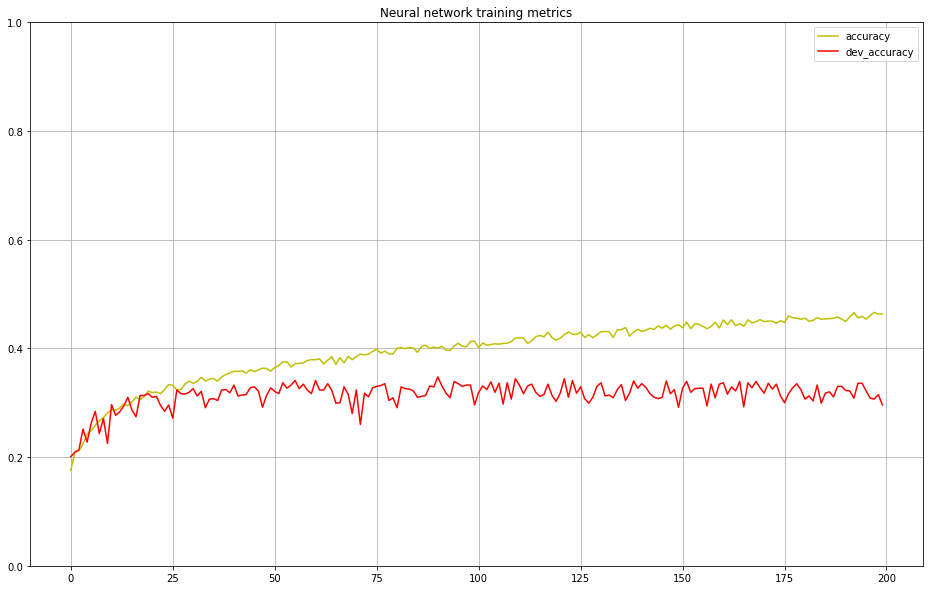

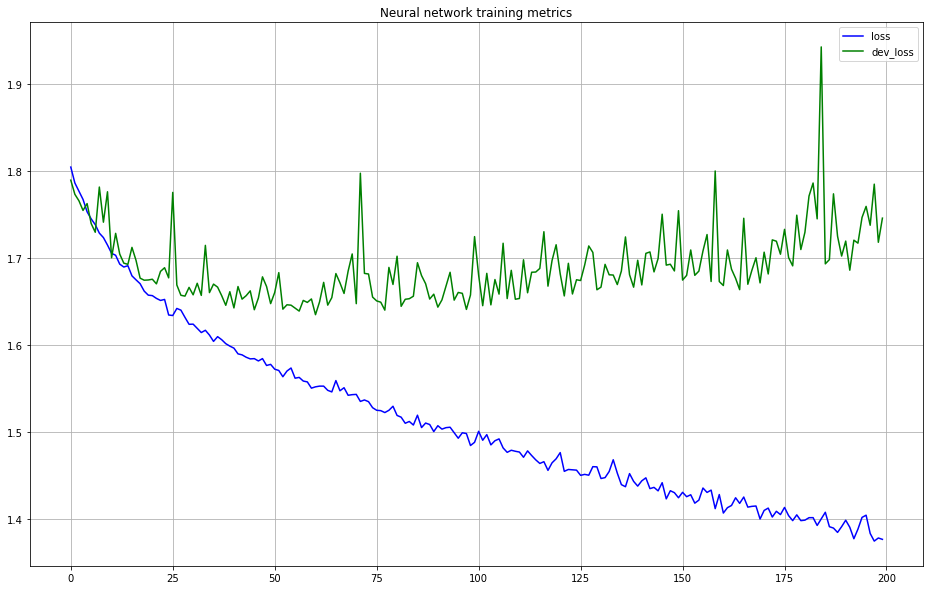

In [160]:
history = json.load(open(f"{folder}/history.json", "r"))

print(history.keys())

pd.DataFrame({
    'accuracy': history['accuracy'],
    'dev_accuracy': history['val_accuracy'],
}).plot(figsize = (16, 10), color='yr')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Neural network training metrics")
plt.savefig(f"{folder}/accuracy.png")
plt.show()

pd.DataFrame({
    'loss': history['loss'],
    'dev_loss': history['val_loss'],
}).plot(figsize = (16, 10), color='bg')
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.title("Neural network training metrics")
plt.savefig(f"{folder}/loss.png")
plt.show()